In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
# 데이터 불러오기
data = pd.read_excel('CustomerDataSet.xls')

# 데이터 복사
data2 = data.copy()
data2

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


In [4]:
# 정규화 전처리
data2[['ItemsBought','ItemsReturned']] = MinMaxScaler().fit_transform(data2[['ItemsBought','ItemsReturned']])
data2

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,2,1365
1,5,0.804878,0.818182,5,2764
2,6,1.000000,0.000000,1,1343
3,8,0.097561,0.545455,4,2435
4,9,0.024390,0.318182,3,2435
5,10,0.609756,0.772727,6,2896
6,11,0.756098,0.909091,8,2869
7,12,0.756098,0.363636,2,1236
8,14,0.000000,0.409091,8,2435
9,15,0.658537,0.318182,2,1764


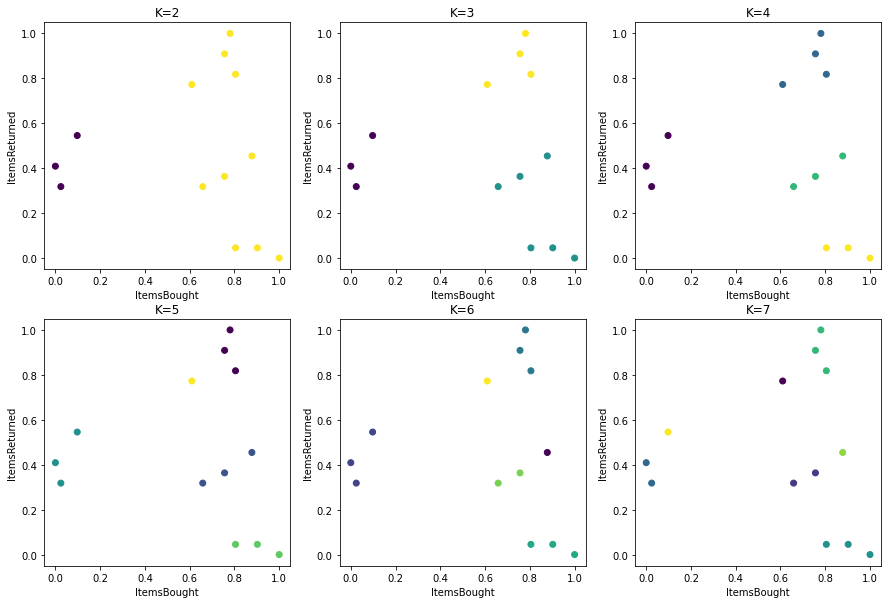

In [26]:
plt.figure(figsize=(15,10))
for k in range(2,8):
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(data2[['ItemsBought','ItemsReturned']])
    
    plt.subplot(2,3,k-1)
    plt.title(f'K={k}')
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    plt.scatter(data2['ItemsBought'],data2['ItemsReturned'],c=pred)

In [32]:
# 군집분석
model = KMeans(n_clusters=4)
pred = model.fit_predict(data2[['ItemsBought','ItemsReturned']])
pred

array([3, 1, 0, 2, 2, 1, 1, 3, 2, 3, 0, 0, 1])

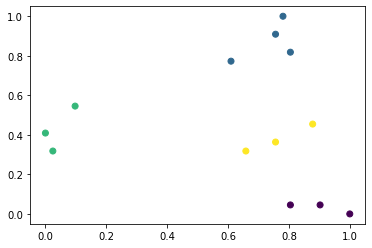

In [40]:
# 시각화
plt.scatter(data2['ItemsBought'],data2['ItemsReturned'],c=pred)
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

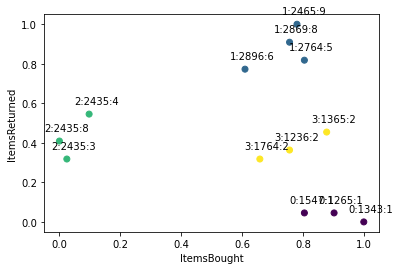

In [43]:
# 시각화 - 각 데이터 제품번호 출력
for index,c_id,bought,returned,zipcode,product in data2.itertuples():
    plt.annotate(f'{pred[index]}:{product}:{zipcode}',(bought-0.05,returned+0.05))
plt.scatter(data2['ItemsBought'],data2['ItemsReturned'],c=pred)
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

In [28]:
list(data2.itertuples())

[Pandas(Index=0, _1=4, ItemsBought=0.878048780487805, ItemsReturned=0.4545454545454546, ZipCode=2, Product=1365),
 Pandas(Index=1, _1=5, ItemsBought=0.8048780487804879, ItemsReturned=0.8181818181818182, ZipCode=5, Product=2764),
 Pandas(Index=2, _1=6, ItemsBought=1.0, ItemsReturned=0.0, ZipCode=1, Product=1343),
 Pandas(Index=3, _1=8, ItemsBought=0.0975609756097561, ItemsReturned=0.5454545454545454, ZipCode=4, Product=2435),
 Pandas(Index=4, _1=9, ItemsBought=0.02439024390243902, ItemsReturned=0.3181818181818182, ZipCode=3, Product=2435),
 Pandas(Index=5, _1=10, ItemsBought=0.6097560975609757, ItemsReturned=0.7727272727272727, ZipCode=6, Product=2896),
 Pandas(Index=6, _1=11, ItemsBought=0.7560975609756098, ItemsReturned=0.9090909090909092, ZipCode=8, Product=2869),
 Pandas(Index=7, _1=12, ItemsBought=0.7560975609756098, ItemsReturned=0.36363636363636365, ZipCode=2, Product=1236),
 Pandas(Index=8, _1=14, ItemsBought=0.0, ItemsReturned=0.4090909090909091, ZipCode=8, Product=2435),
 Pand